(sec:ode-boundary-value-problems)=
# Boundary Value Problems

When we solve a Newton equation, a set of initial conditions, i.e.,  initial position $x(t_0)$ and velocity $\dot{x}(t_0)$, are usually specified. In general second order ODEs need two conditions for each variable.  However, a set of initial conditions is not only the way to specify the two independent conditions.  For example, A trajectory $x(t)$ can be uniquely determined by specifying an initial position $x(t_\text{i})$ and a final position $x(t_\text{f})$ (Dirichlet boundary condition). When the two conditions are given at two different time we call it a _boundary value problem_.  It seems strange to use a future position as a condition but it is a popular problem in physics. For example, we could ask a question like how fast we should drive to arrive at the destination in a given time. It is also possible to specify a derivative as a boundary condition (Neumann boundary condition). Boundary value problems are also more common for ODEs with one-dimensional spatial coordinates such as Poisson equation for scalar potential $\varphi(x)$, heat equation for temperature profile $T(x)$, and diffusion equation for particle density $\rho(x)$.   From the numerical view of point, however, there is no difference between temporal and spatial problems.
Eigenvalue problems are also a kind of boundary value problems but we will discuss them in the next chapter.

## Shooting method

In the previous chapter, we solved Newton's equation of motion as an initial value problem.  Now, we solve a Newton equation as a boundary value problem.  Consider the following problem:
The trajectory of a particle of mass $m$ is determined by a Newton's equation of motion
\begin{equation}
\ddot{x} = F(x, \dot{x}, t)
\end{equation}
as before. At time $t=t_\text{i}$, the particle is located at $x_\text{i}$. The particle arrives at $x_\text{f}$ at time $t_\text{f}$.  What are the trajectory $x(t)$ and velocity $v(t)$ of the particle?  This is clearly a boundary value problem.  If we can solve the Newton equation as an initial value problem, the trajectory can be considered as a function of the initial position $x_\text{i}$ and velocity $v_\text{i}$. We write it as $x(t;x_\text{i}, v_\text{i})$.  We know that the particle must be at $x_\text{f}$ at time $t_\text{f}$. Thus, we have $x(t_\text{f}; x_\text{i}, v_\text{i}) = x_\text{f}$ where only $v_\text{i}$ is unknown. By solving this equation for $v_\text{i}$  we find the answer.  This is nothing but a root finding problem.  Once we find the initial velocity, we can find $x(t)$ and $v(t)$ by solving the Newton equation using the method discussed in the previous chapter.  In other words, the boundary value problem is now replaced with an initial value problem combined with root finding.  The root finding method needs a function value $f(v_\text{i}) \equiv  x(t_\text{f}; x_\text{i}, v_\text{i}) - x_\text{f}$.  In other words, we must be able to evaluate $f(v_\text{i})$ for any given $v_\text{i}$.  The evaluation of $f(v_\text{i})$ is an initial value problem and thus we can solve it by the method discussed in the previous chapter.

Since the solution to a Newton equation is unique, there is only one root.  Therefore, the secant method should work well.  Remembering that the secant method needs two initial guesses.  The algorithm known as shooting method is given in Algorithm \ref{algo:shooting}. We shoot again and again not at random but with some intelligence until the target is hit.


```{admonition} Algorithm 5.1:  Shooting method

1. Guess an initial velocity $v_1$.  Here subscript "1" indicates the first try.
2. Solve the Newton equation as an initial value problem using $v_1$ and get the final position  $x_1=x(t_\text{f})$.  Here the subscript "1" indicates the first try.
3. If $|x_1 - x_\text{f}| < \text{tolerance}$, we already found a solution. Otherwise continue to step 4.
4. Change the initial velocity slightly $v_2 = v_1 + \delta$.  This is the second try.
5. Solve the Newton equation again and get $x_2=x(t_\text{f})$.
6. If $|x_2 - x_\text{f}| < \text{tolerance}$ then we find a solution.  Otherwise continue step 7.
7. Now, we enter a loop of the secant method.
8. $v_{n+1} = v_{n} - \displaystyle\frac{v_{n} - v_{n-1}}{x_{n}-x_{n-1}} \left [ x_n - x_\text{f} \right ]$.  Here, the $(n+1)$-th try is suggested by the secant method.
9. Solve the Newton equation with $v_{n+1}$ as initial condition and get $x_{n+1} = x(t_\text{f})$.
10. If $|x_{n+1} - x_\text{f}| < \text{tolerance}$ then we find a solution.  Otherwise repeat from step 8.



---
**Example**  Air Rocket

A compressed air rocket of mass $m=1$ kg is launched vertically from ground.  We want to make it reach height $y_\text{f}=100$ m in $t_\text{f}=2$ s.  At what speed should the rocket be launched?
The Newton equation for the rocket is

$$
m \ddot{y} = - C  |\dot{y}| \dot{y} - m g
$$(eq:eom_rocket)

where $C$ is a coefficient of drag force.[^1].  A typical value is $C=0.01$ kg/m. Note that the rocket may reach a desired height at a given time on its way down. 

If the rocket satisfies the condition on its way up, the analytic solution is given by

$$
v_\text{i} = \frac{\sqrt{g \lambda} 
\left [ \sqrt{e^{2 y_\text{f}/\lambda}} - \cos\left (\sqrt{\frac{g\, t_\text{f}^2}{\lambda}}\right )\right ]}
{\sin\left (\sqrt{\frac{g\, t_\text{f}^2}{\lambda}}\right )}
$$

where $\lambda = m/C$.  Substituting all parameter values we obtain $v_\text{i}=101.9281$ m/s.  We try to get this value numerically using the shooting method.  Program \ref{prog:air-rocket} solves the problem using the 4th-order Runge-Kutta and secant methods.  

First, we have to guess the first two steps. The average speed, $50$ m/s, may be a good starting value.  The second guess should be slightly faster since the answer must be larger than the average speed. We use $51$ m/s for the second guess.  Figure \ref{fig:shoot_rocket} shows how the iteration of secant method improves the solution.  Our initial guess is far from the final answer.  Nevertheless the iteration quickly converges to the correct answer. With tolerance $10^{-8}$, the calculation stopped after 6 secant  iterations.  The final velocity is positive and thus the rocket is moving upward.  The final answer $v_\text{i}=101.9968$ m/s is close to the exact one. 

[^1]: If only linear drag force is considered the problem is too trivial because we are looking for a root of a linear equation. The secant method converges immediately at the first iteration.  Quadratic drag force requires at least several steps due to non-linearity.

initial velocity = 101.928104 final velocity =  23.636257


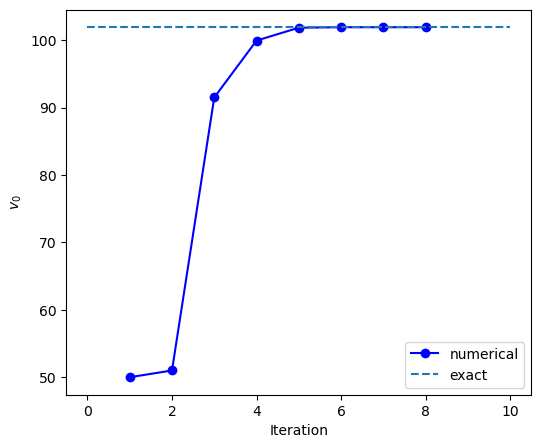

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(v):
    # right hand side of the ODE
    g=9.8; m=1.0; C=0.01
    return -(C/m)*np.abs(v)*v-g

def rocket_trajectory(vi,t):
    # Solve the ODE using RK5 and return the final position and velocity
    N=1000
    h=t/N
    y0=0.0
    v0=vi
    
    for n in range(N):
        ky1 = v0
        kv1 = f(v0)

        y_mid = y0 + ky1*h/2.0
        v_mid = v0 + kv1*h/2.0
        ky2 = v_mid
        kv2 = f(v_mid)
      
        y_mid = y0 + ky2*h/2.0
        v_mid = v0 + kv2*h/2.0
        ky3 = v_mid
        kv3 = f(v_mid)

        y_end = y0 + ky3*h
        v_end = v0 + kv3*h
        ky4 = v_end
        kv4 = f(v_end)
    
        y0=y0+(ky1+2*(ky2+ky3)+ky4)*h/6.0
        v0=v0+(kv1+2*(kv2+kv3)+kv4)*h/6.0

    return [y0,v0]

yf=100.0; tf=2.0

# tolerance
tol=1e-8

# control variable 
nmax = 100
found = False

y=np.zeros(nmax+1)
v=np.zeros(nmax+1)
# first guess
n=1
v[n] = 50.0
[y[n], vf] = rocket_trajectory(v[n],tf)
if np.abs(y[n]-yf) < tol :
    found = True
    v0 = v[n]

#second guess
n+=1
v[n] = 51.0
[y[n], vf] = rocket_trajectory(v[n],tf)
if np.abs(y[n]-yf) < tol:
    found = True
    v0 = v[n]

# secant iteration
while not(found) :
    v[n+1] = v[n] - (v[n]-v[n-1])/(y[n]-y[n-1])*(y[n]-yf)
    [y[n+1], vf] = rocket_trajectory(v[n+1],tf)
    if np.abs(y[n+1]-yf) < tol:
        found = True
        v0 = v[n+1]
    n+=1

# show the result
print('initial velocity = {0:10.6f} final velocity = {1:10.6f}'
          .format(v[n],vf))

# plot the convergency
plt.ioff()
plt.figure(figsize=(6,5))
plt.plot(np.linspace(1,n,n),v[1:n+1],'-ob',label='numerical')
plt.plot([0,n+2],[101.9281,101.9281],'--',label='exact')
plt.xlabel('Iteration')
plt.ylabel('$v_0$')
plt.legend(loc=4)
plt.show()


## Numerov method

An efficient method is available for the second-order ODE of the following form:

$$
\frac{d^2 y}{d x^2} + w(x) y = S(x)
$$(eq:sturm)

This type of differential equations is popular in physics.  For example, when $w(x)=0$ this equation is equivalent to one-dimensional Poisson equation, heat equation, and diffusion equation.  It becomes a Shr\"{o}dinger equation (energy eigenvalue equation) and Newton equation for parametric harmonic oscillators if $S(x)=0$. 
The algorithm shown below is essentially the same as initial value problems and can be used to solve them.  However, since this type of differential equation appear mostly in boundary value problems, we focus on the boundary value problems. 

Recall the three-points numerical second-order derivative \eqref{eq:diff2-s3},

$$
\frac{y_{n+1} - 2 y_n + y_{n-1} }{h^2} = \frac{dy^22}{d^2x} 
+ \frac{h^2}{12} \frac{d^4y}{dx^4} + \mathcal{O}(h^4)
$$(eq:diff2-expansion)

here we includes the forth order term explicitly.  We can evaluate it  
using the original differential equation as follows:

$$
\begin{split}
\frac{d^4y}{dx^4} = & \frac{d^2}{dx^2} \left( -w(x) y + S(x) \right)\nonumber\\
 = & - \frac{ w_{n+1} y_{n+1} - 2 w_n y_n + w_{n-1} y_{n-1} }
{h^2} + \frac{S_{n+1} - 2 S_n + S_{n-1}} {h^2} + \mathcal{O}(h^2)
\end{split}
$$(eq:diff4)

where $w_n = w(x_n)$ and $S_n = S(x_n)$.
Substituting Eqs. {eq}`eq:diff2-expansion` and {eq}`eq:diff4` to Eq. {eq}`eq:sturm`
and rearranging $y$'s, the explicit recursive equation is obtained:

$$
\begin{split}
\left(1 + \frac{h^2}{12} w_{n+1} \right) y_{n+1}  = &
2 \left( 1 - \frac{5h^2}{12} w_n \right) y_n 
- \left( 1 + \frac{h^2}{12} w_{n-1} \right) y_{n-1} \\
& +  \frac{h^2}{12} \left( S_{n+1} + 10 S_n + S_{n-1} \right) + \mathcal{O}(h^6)
\end{split}
$$(eq:numerov)

This algorithm is one order more accurate than the fourth-order Runge-Kutta
method and yet $w(x)$ and $S(x)$ are evaluated only one time on the
grid points.  Therefore, the Numerov method is more efficient than
the Runge-Kutta method for this type of the second-order differential
equation.

**Example**: One-dimensional Poisson equation


Electric potential $\phi(x)$ in one-dimensional space satisfies the Poisson equation

$$
\phi''(x) = -\frac{\rho(x)}{\epsilon_0}
$$(eq:poisson1d)

where $\rho(x)$ is electric charge density and $\epsilon_0$ vacuum permittivity.  We consider an electric charge density

$$
\rho(x) = C x e^{-x^2}
$$(eq:charge)

where $C$ is a positive constant. The present model has an exact solution 

$$
\phi(x) = \frac{\sqrt{\pi}}{2} \text{erf}(x)
$$

where $\text{erf}$ is the error function. We solve this model numerically using the Numerov method and secant root finding.

For simplicity, we set $C/\epsilon_0=1$.  As Fig. \ref{fig:poisson1d} shows the charge density is localized around $x=0$.
Since $\int_{-\infty}^{\infty} \rho(x) dx = 0$ (the net charge is zero), the charge is invisible from distance.  Therefore, the potential should be nearly constant at $|x| \gg 1$. Mathematically speaking, the boundary condition is $\displaystyle\lim_{|x| \rightarrow \infty} \phi'(x) = 0$.  This kind of boundary condition at infinity is not suitable for numerical calculation. We assume that $\phi'(\pm L) = 0$ for some large $L$.  A common method integrates the ODE from $x=-L$ using $\phi(-L)$ and $\phi'(-L)$ as boundary conditions.  Since we don't know $\phi(-L)$, we guess one.  Then, we solve the ODE as initial value problem and find $\phi'(L)$.  If this value does not match to the given boundary condition, the initial guess was wrong.  Then, we start over again with a different value of $\phi(-L)$ suggested by the secant method.  

The above method should work well but there is an even better way by taking into account the symmetry of the problem.  Since the charge density is anti-symmetric ($\rho(-x) = -\rho(x)$),  $\phi''(x)$ is also anti-symmetric and thus $\phi(x)$ must be anti-symmetric, too.  Therefore, $\phi(0)=0$.  We can start at $x=0$ and shoot out toward $x=L$. A shorter shooting range is better!  We still have to guess the next function value, $\phi(h)$ where $h$ is step size of $x$. Using $\phi(0)$ and $\phi(h)$, we can find the potential up to the end point $\phi(L)$.  If $|\phi'(L)| < \text{tolerance}$, the guess is correct and we found a solution. Otherwise, repeat the calculation using a new guess suggested by the secant method.  However, we don't know $\phi'(L)$ and thus we need to evaluate it numerically. It does not have to be super accurate and the forward finite difference method \eqref{eq:diff_fwd} is sufficient for this purpose.

$$
\phi'(L) = \frac{\phi(L)-\phi(L-h)}{h}
$$

In the left panel of Fig \ref{fig:poisson1d}, the numerical solution is compared with the analytic solution. The agreement is so good that they are visually indistinguishable. The right panel shows that the progressive improvement toward the given boundary condition $\phi'(L)=0$.  Despite that the initial guess was quite off the mark, the iteration converges very quickly.



Itertation =    2, y2=   -3.07432e-09
Itertation =    3, y2=    0.00000e+00


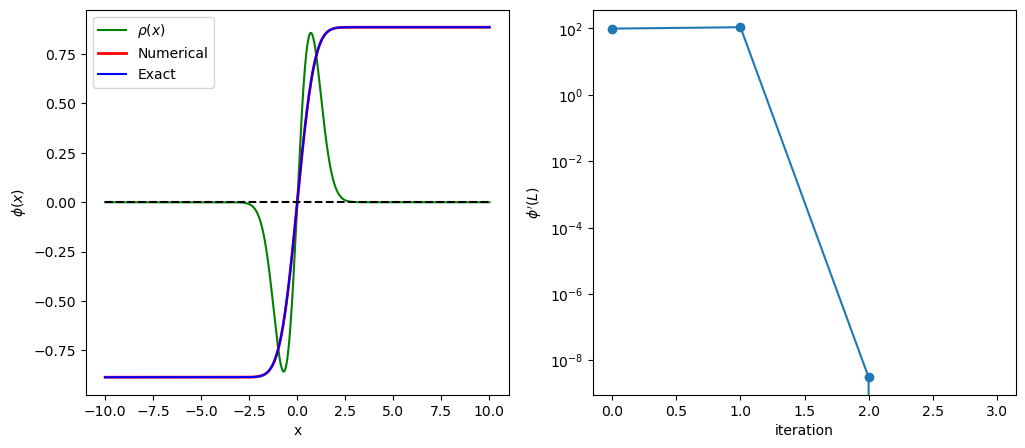

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

def S(x):
    return -2.0*x*np.exp(-x**2)
    
def numerov_poisson(y1,L,N):
#    control parameters
    h=L/N
    x=np.linspace(0,L,N+1)
    y=np.zeros(N+1)  # field phi(x)
    s=np.zeros(N+1)

    # initial conditions
    # due to symmetry phi(0)=0
    y[0]=0.0
    s[0]=S(y[0])

    # we guess phi(h)=phi_1
    y[1]=y1
    s[1]=S(x[1])

    # shoot out to x=L by the Numerov method
    n=1
    while n < N :
        s[n+1]=S(x[n+1])
        y[n+1] = 2.0*y[n]-y[n-1]+(s[n+1]+10.0*s[n]+s[n-1])*h**2/12.0
        n+=1
        
    return x, y

# set the boundary conditions
L=10.0
N=10000
# tolerance
tol=1.0e-16
# control variable 
found = False

y1=np.zeros(101)
y2=np.zeros(101)
n=1
# first guess of phi_1
y1[0] = 0.1

# get the potential phi(x)
x, y = numerov_poisson(y1[0],L,N)

# derivative of phi(x) at the end point.
y2[0] = (y[N]-y[N-1])/(x[N]-x[N-1])
if np.abs(y2[0]) < tol:
    found = True

if not(found):
    # second guess of phi_1
    y1[1] = y1[0]+0.01
    # get the potential phi(x)
    x, y = numerov_poisson(y1[1],L,N)
    # derivative of phi(x) at the end point.
    y2[1] = (y[N]-y[N-1])/(x[N]-x[N-1])
    if np.abs(y2[1]) < tol:
        found = True

# secant iteration
n=1
while not(found):

    # guess phi_1 by secant method
    y1[n+1] = y1[n] - (y1[n]-y1[n-1])/(y2[n]-y2[n-1])*y2[n]
    # derivative of phi(x) at the end point.
    x, y = numerov_poisson(y1[n+1],L,N)
    # derivative of phi(x) at the end point.

    y2[n+1] = (y[N]-y[N-1])/(x[N]-x[N-1])
    if np.abs(y2[n+1]) < tol:
        found = True

    n+=1
    print("Itertation ={0:5d}, y2={1:15.5e}".format(n,y2[n]))

# construct the whole curve from x=-L to x=L.
X=np.zeros(2*N+1)
Y=np.zeros(2*N+1)
X[0:N] = -x[N:0:-1]; X[N:2*N+1]=x[0:N+1]
Y[0:N] = -y[N:0:-1]; Y[N:2*N+1]=y[0:N+1]

#plot charge density
plt.ioff()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(X,2*X*np.exp(-X*X),'-g',label=r"$\rho(x)$")

# plot the numerical potential
plt.plot(X,Y,'-r',linewidth=2.0,label="Numerical")
# plot the analytic potential
plt.plot(X,np.sqrt(np.pi)/2.0*erf(X),'-b',label="Exact")
plt.plot([-L,L],[0.0,0.0],'--k')
plt.xlabel('x')
plt.ylabel(r"$\phi(x)$")
plt.legend(loc='best')

plt.subplot(1,2,2)
    # plot the improvment of the first point.
plt.semilogy(np.linspace(0,n,n+1),abs(y2[0:n+1]),'-o')
plt.xlabel('iteration')
plt.ylabel(r"$\phi'(L)$")
plt.show()


---
Last updated: {sub-ref}`today`